In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:

input_dim = 784
number_of_hidden_units = 15
output_dim = 10

#placeholders for our training points
x = tf.placeholder(tf.float32,[None, input_dim])
y = tf.placeholder(tf.float32,[None, output_dim])
# Layer 1
W1 = tf.Variable(tf.random_normal([input_dim, number_of_hidden_units], stddev=0.1),name ='W1')
b1 = tf.Variable(tf.zeros([number_of_hidden_units]),name='b1')
pre_active = tf.matmul(x , W1) + b1
post_active = tf.nn.sigmoid(pre_active)

# Layer 2
W2 = tf.Variable(tf.random_normal([number_of_hidden_units, output_dim], stddev=0.1),name ='W2')
b2 = tf.Variable(tf.zeros([output_dim]),name='b2')    
model_pred = tf.matmul(post_active , W2) + b2
#=================================================================================
#=================================================================================
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits = model_pred))

# tf.argmax(input, axis=None, name=None, dimension=None)
correct_prediction = tf.equal(tf.argmax(model_pred,1), tf.argmax(y,1))
# tf.cast(x, dtype, name=None)  casts x (in case of Tensor) or x.values (in case of SparseTensor) to dtype
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#=================================================================================
#=================================================================================



optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()

#run the initilizer
sess = tf.InteractiveSession()

sess.run(init)


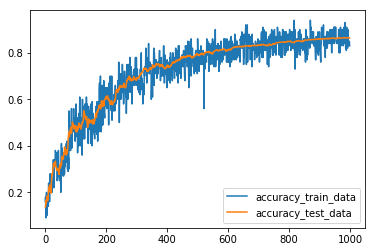

In [3]:
accuracy_train_seq=[]
accuracy_test_seq =[]
for i in range(1000):
    batch = mnist.train.next_batch(100)
#     optimizer.run(feed_dict={x: batch[0], y: batch[1]})
    training_acc, _ = sess.run([ accuracy,optimizer],feed_dict= {x: batch[0], y: batch[1]})
    accuracy_train_seq += [training_acc]
#    print 'test accuracy:'
    accuracy_test_seq += [accuracy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels})]
    
trn, = plt.plot( accuracy_train_seq, label='accuracy_train_data')
tst, = plt.plot( accuracy_test_seq, label='accuracy_test_data')
plt.legend(handles=[trn, tst])